# Simple Gaussian Process 
***

We start simple gaussian process by considering a joint multivariant gaussian. The Gaussian is defined as follows:

<img src="files/multi-variant-gaussian.png">

We know that we can drive a marginal distribution from this joint distribution. We can than use bayes rule to find a posterior distribution of gaussian processes using the magrinal distribution and the prior provided. We also know that the posterior distribution would be a joint probability of our outcome values, some of which we have observed (denoted collectively by $f$) and some of which we haven’t (denoted collectively by $f_∗$. We can denote it as follows:

<img src="files/posterior-gaussian-process.png">

from this joint posterior distribution, we tend to find distribution of unknown functions given the functions at known points(i.e: $p(f_* | f)$). As the joint distribution is gaussian, we know that the marginal distribution of this distribution is also a gaussian. 

We can represent the marginal gaussian distribution as follows:

$p(f_* | f) = f_∗ ∼ N(μ_∗,Σ_∗) ∼ μ + BN(0,I) $

The second approximation of gaussian shows that the gaussian is some noise added to mean, the noise is some covariance matrix multiplied by the normal distribution with zero mean and identity noise.

Using this representation of gaussian we define $B$ as $BB^T =Σ_∗$. The $B$ is square root of the covarriance matrix that is required to find marginal posterior distribution. We can approximate this matrix using **Cholesky decomposition.**

The simple example below uses Radial Bases funtions to generate some prior gaussian process. This prior would than be used to generate posterior distribution when we start to observe the data.

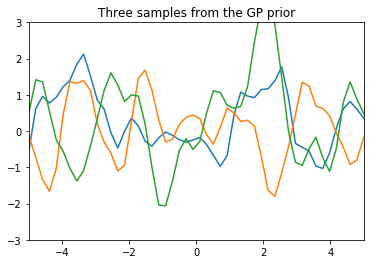

In [5]:
import numpy as np
import matplotlib.pyplot as pl

# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

# Now let's plot the 3 sampled functions.
pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP prior')
pl.show()